In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.svm import SVC

from pycaret.classification import *


from sklearn.model_selection import cross_validate, StratifiedKFold

from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import shap
from sklearn.metrics import roc_curve, auc,roc_auc_score

import time
import pandas as pd
from sklearn.base import clone

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Optimización bayesiana
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical


In [2]:
# Cargar arrays de datos preprocesados
X_train = pd.read_csv("../preprocessing/X_train_proc.csv")
X_test  = pd.read_csv("../preprocessing/X_test_proc.csv")
y_train = pd.read_csv("../preprocessing/y_train_raw.csv")
y_test  = pd.read_csv("../preprocessing/y_test_raw.csv")

# Cargar el preprocesador si necesitas aplicar más transformaciones después
preprocessor = joblib.load("../preprocessing\preprocesador.pkl")

In [3]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (39073, 14)
y_train: (39073, 1)
X_test: (9769, 14)
y_test: (9769, 1)


In [4]:
print("y_train tamaño:", y_train.shape)
print("Valores únicos en y_train:", y_train.nunique())

y_train tamaño: (39073, 1)
Valores únicos en y_train: income    2
dtype: int64


In [5]:
#Fue necesario iterar para comprobar que el tipo de variable y_train era correcto y corregirlo
print("X_train dtype:", y_train.shape)
print("Valores únicos en X_train:", y_train.nunique())


X_train dtype: (39073, 1)
Valores únicos en X_train: income    2
dtype: int64


In [6]:
#Crear df_train para que lo admita pycaret
df_train = pd.concat([X_train, y_train], axis=1)


In [7]:
clf_setup = setup(
    data=df_train,
    target='income',
    session_id=42,
    preprocess=False,
    verbose=False,
    fold=3,
    
)

In [8]:
mejor_modelo = compare_models(
    include=[
        'lr',         # Logistic Regression
        'rf',         # Random Forest
        'xgboost',    # XGBoost
        'lightgbm',   # LightGBM
        'et',         # Extra Trees
        'ridge'       # Ridge Classifier
    ],
    sort='F1'
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8477,0.9021,0.6104,0.7147,0.6584,0.5611,0.5641,0.1533
xgboost,Extreme Gradient Boosting,0.8403,0.8945,0.6012,0.6939,0.6442,0.5419,0.5443,1.1133
rf,Random Forest Classifier,0.8374,0.8879,0.5867,0.6909,0.6345,0.5309,0.5338,1.4567
lr,Logistic Regression,0.8409,0.8942,0.5702,0.7111,0.6329,0.5329,0.5382,1.3100
et,Extra Trees Classifier,0.8308,0.8772,0.5845,0.6698,0.6242,0.5157,0.5177,0.3700
ridge,Ridge Classifier,0.8374,0.8901,0.5087,0.7338,0.6008,0.5029,0.5163,0.0267


In [9]:
lgbm = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:50:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8502,0.9040,0.6236,0.7165,0.6668,0.5708,0.5731
1,0.8463,0.9005,0.6129,0.7089,0.6574,0.5590,0.5615
2,0.8466,0.9018,0.5946,0.7189,0.6509,0.5537,0.5577
Mean,0.8477,0.9021,0.6104,0.7147,0.6584,0.5611,0.5641
Std,0.0018,0.0014,0.0120,0.0043,0.0066,0.0072,0.0065


In [10]:
xgb = create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8416,0.8958,0.6131,0.6928,0.6505,0.5486,0.5503
1,0.8393,0.8933,0.6001,0.6912,0.6424,0.5395,0.5417
2,0.8400,0.8943,0.5905,0.6977,0.6397,0.5377,0.5408
Mean,0.8403,0.8945,0.6012,0.6939,0.6442,0.5419,0.5443
Std,0.0010,0.0010,0.0093,0.0028,0.0046,0.0048,0.0043


In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8380,0.8899,0.5949,0.6889,0.6384,0.5348,0.5372
1,0.8362,0.8852,0.5841,0.6880,0.6318,0.5274,0.5303
2,0.8381,0.8886,0.5809,0.6958,0.6332,0.5304,0.5340
Mean,0.8374,0.8879,0.5867,0.6909,0.6345,0.5309,0.5338
Std,0.0009,0.0019,0.0060,0.0035,0.0029,0.0030,0.0028


In [12]:
lgbm_opt = tune_model(
    lgbm,
    optimize='F1',
    search_library='scikit-optimize',
    n_iter=50,
    choose_better=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8478,0.9035,0.6255,0.7074,0.6639,0.5660,0.5678
1,0.8492,0.9013,0.6275,0.7115,0.6668,0.5699,0.5717
2,0.8497,0.9036,0.6097,0.7223,0.6612,0.5656,0.5689
Mean,0.8489,0.9028,0.6209,0.7137,0.6640,0.5671,0.5695
Std,0.0008,0.0010,0.0080,0.0063,0.0023,0.0019,0.0017


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [13]:
xgb_opt = tune_model(xgb, optimize='F1',
                    search_library='scikit-optimize', n_iter=50, choose_better=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8174,0.8960,0.7609,0.5938,0.6671,0.5439,0.5518
1,0.8265,0.8978,0.7825,0.6083,0.6845,0.5674,0.5759
2,0.8266,0.8977,0.7588,0.6127,0.6779,0.5611,0.5671
Mean,0.8235,0.8971,0.7674,0.6049,0.6765,0.5575,0.5650
Std,0.0043,0.0008,0.0107,0.0081,0.0072,0.0099,0.0100


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [14]:
rf_opt = tune_model(rf, optimize='F1',
                    search_library='scikit-optimize', n_iter=50, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8109,0.9008,0.8266,0.5741,0.6776,0.5499,0.5682
1,0.8115,0.8977,0.8349,0.5743,0.6805,0.5532,0.5727
2,0.8135,0.8998,0.8203,0.5794,0.6791,0.5531,0.5697
Mean,0.8120,0.8994,0.8273,0.5760,0.6791,0.5521,0.5702
Std,0.0011,0.0013,0.0060,0.0024,0.0012,0.0015,0.0019


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [15]:
print(lgbm_opt.get_params())
print("")
print(xgb_opt.get_params())
print("")
print(rf_opt.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.49999999999999994, 'max_depth': -1, 'min_child_samples': 100, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 197, 'n_jobs': -1, 'num_leaves': 256, 'objective': None, 'random_state': 42, 'reg_alpha': 10.0, 'reg_lambda': 10.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'bagging_fraction': 0.4, 'bagging_freq': 0, 'feature_fraction': 0.6637577331805016}

{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.7717015338451563, 'device': 'cpu', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.17502697429833836, 'max_bin': None, 'm

In [16]:
lgbm_params = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.5,
    'max_depth': -1,
    'min_child_samples': 100,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 197,
    'n_jobs': -1,
    'num_leaves': 256,
    'objective': None,
    'random_state': 42,
    'reg_alpha': 10.0,
    'reg_lambda': 10.0,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0,
    'bagging_fraction': 0.4,
    'bagging_freq': 0,
    'feature_fraction': 0.6637577331805016
}
lgbm_model = create_model('lightgbm', **lgbm_params)


xgb_params = {
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'colsample_bytree': 0.7717015338451563,
    'device': 'cpu',
    'learning_rate': 0.17502697429833836,
    'max_depth': 6,
    'min_child_weight': 4,
    'n_estimators': 104,
    'n_jobs': -1,
    'random_state': 42,
    'reg_alpha': 3.651573868008674e-10,
    'reg_lambda': 0.00018991349641985853,
    'scale_pos_weight': 2.2642531676225333,
    'subsample': 0.5085836727877318,
    'tree_method': 'auto',
    'verbosity': 0,
    'enable_categorical': False
}
xgb_model = create_model('xgboost', **xgb_params)

rf_params = {
    'bootstrap': True,
    'class_weight': 'balanced_subsample',
    'criterion': 'gini',
    'max_depth': 11,
    'max_features': 0.4,
    'min_impurity_decrease': 4.490672633438402e-06,
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 300,
    'n_jobs': -1,
    'random_state': 42
}
rf_model = create_model('rf', **rf_params)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8478,0.9035,0.6255,0.7074,0.6639,0.5660,0.5678
1,0.8492,0.9013,0.6275,0.7115,0.6668,0.5699,0.5717
2,0.8497,0.9036,0.6097,0.7223,0.6612,0.5656,0.5689
Mean,0.8489,0.9028,0.6209,0.7137,0.6640,0.5671,0.5695
Std,0.0008,0.0010,0.0080,0.0063,0.0023,0.0019,0.0017


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8174,0.8960,0.7609,0.5938,0.6671,0.5439,0.5518
1,0.8265,0.8978,0.7825,0.6083,0.6845,0.5674,0.5759
2,0.8266,0.8977,0.7588,0.6127,0.6779,0.5611,0.5671
Mean,0.8235,0.8971,0.7674,0.6049,0.6765,0.5575,0.5650
Std,0.0043,0.0008,0.0107,0.0081,0.0072,0.0099,0.0100


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8109,0.9008,0.8266,0.5741,0.6776,0.5499,0.5682
1,0.8115,0.8977,0.8349,0.5743,0.6805,0.5532,0.5727
2,0.8135,0.8998,0.8203,0.5794,0.6791,0.5531,0.5697
Mean,0.8120,0.8994,0.8273,0.5760,0.6791,0.5521,0.5702
Std,0.0011,0.0013,0.0060,0.0024,0.0012,0.0015,0.0019


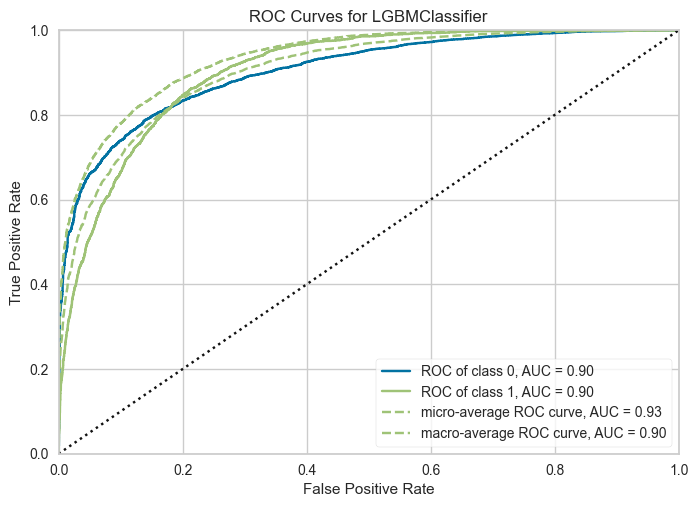

In [17]:
plot_model(lgbm_model)


 Feature Importance XGBoost


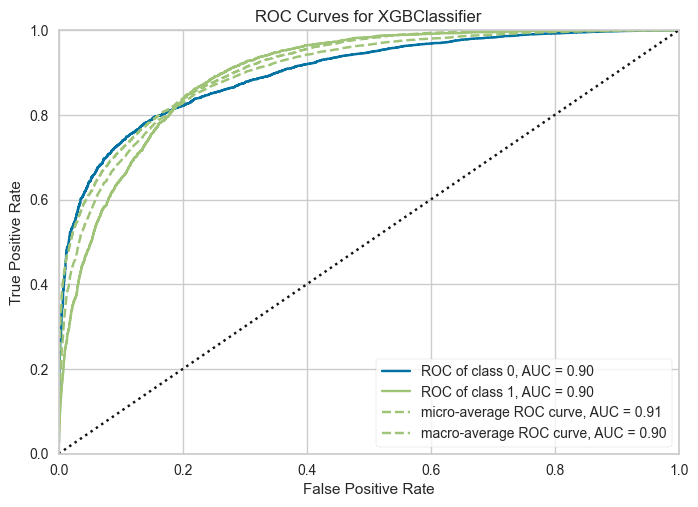

In [18]:
print("\n Feature Importance XGBoost")
plot_model(xgb_model)

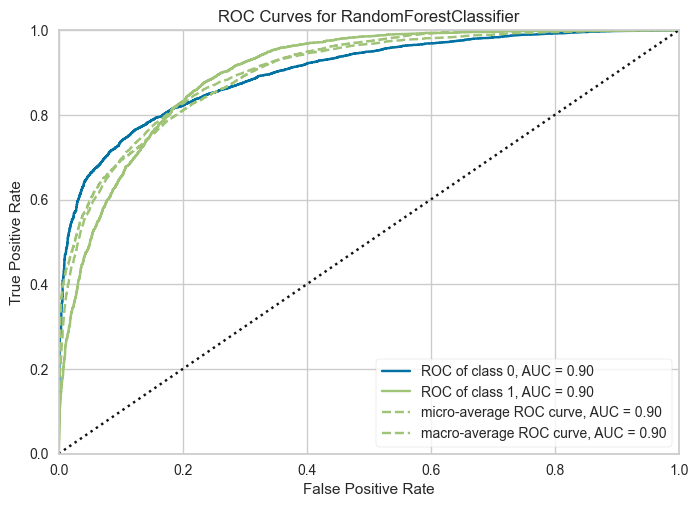

In [19]:
plot_model(rf_model)

# Persistencia

In [20]:
#Los guardamos en pkl
save_model(lgbm_model, '../models/LightGBM_bayes_opt')
save_model(xgb_model,  '../models/XGBoost_bayes_opt')
save_model(rf_model,   '../models/RandomForest_bayes_opt')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=11,
                                         max_features=0.4, max_leaf_nodes=None,
                                         max_samples=None,
                                         min_impurity_decrease=4.490672633438402e-06,
                                         min_samples_leaf=2,
                                         min_samples_split=10,
                                         min_weight_fraction_leaf=0.0,
                                         monotonic_cst=None, n_estimators=30

In [21]:
preprocessor = joblib.load("../preprocessing/preprocesador.pkl")

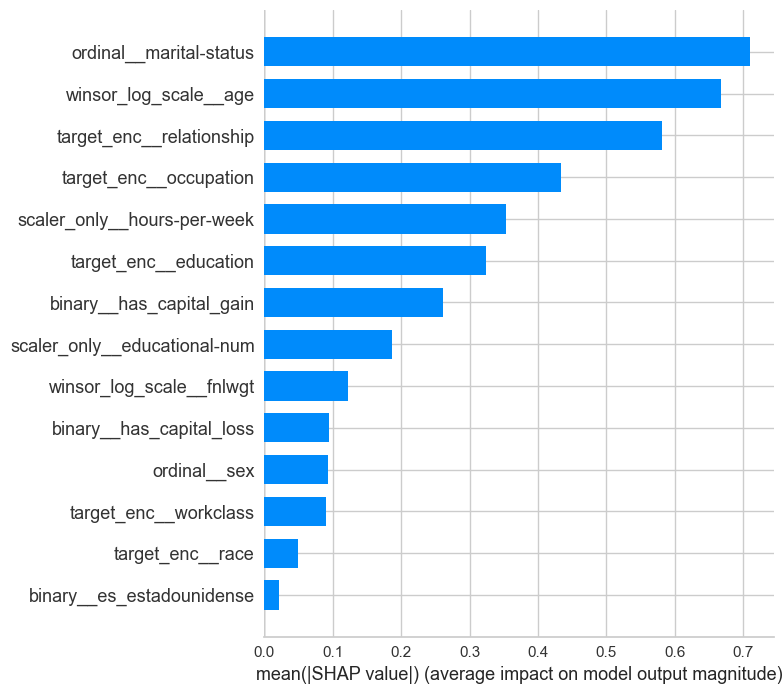

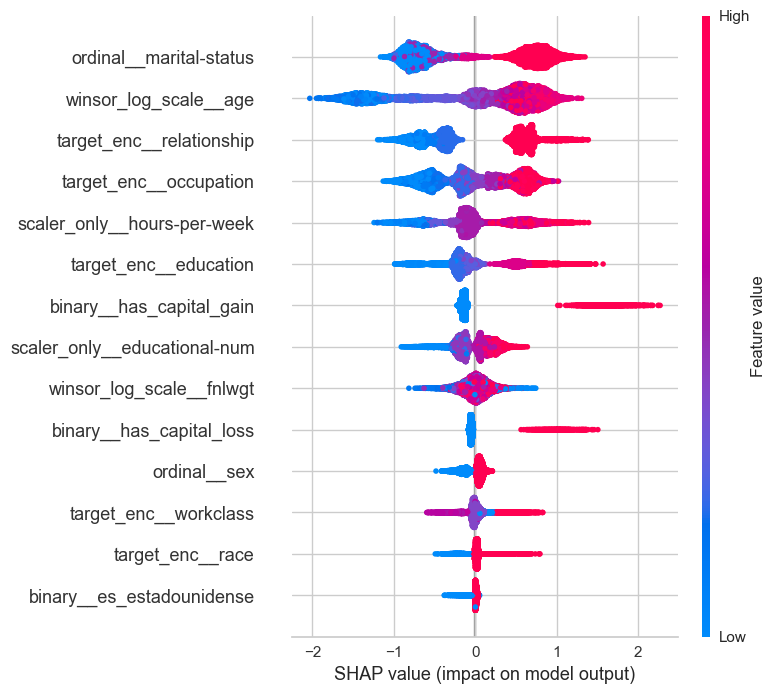

In [22]:
interpret_model(lgbm_model, plot='summary', plot_type='bar')
interpret_model(lgbm_model, plot='summary')

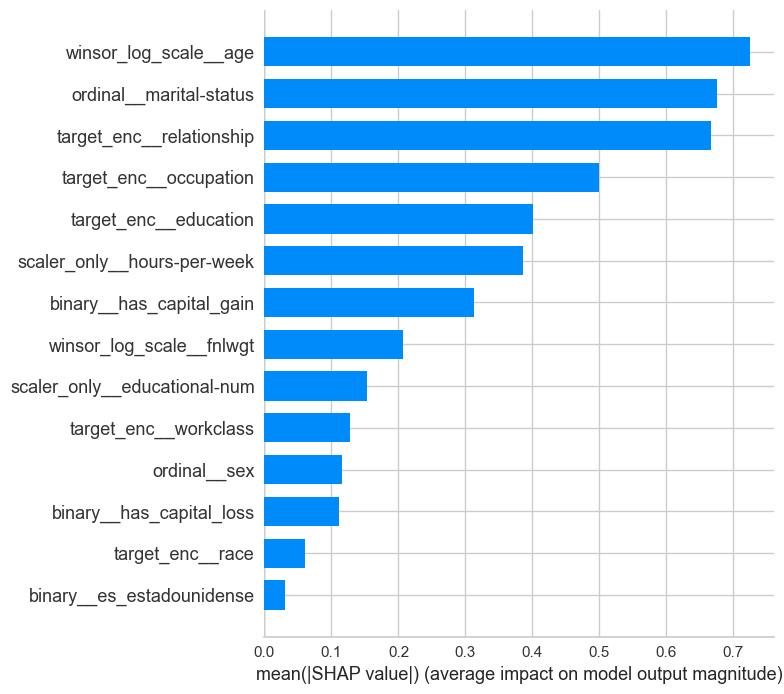

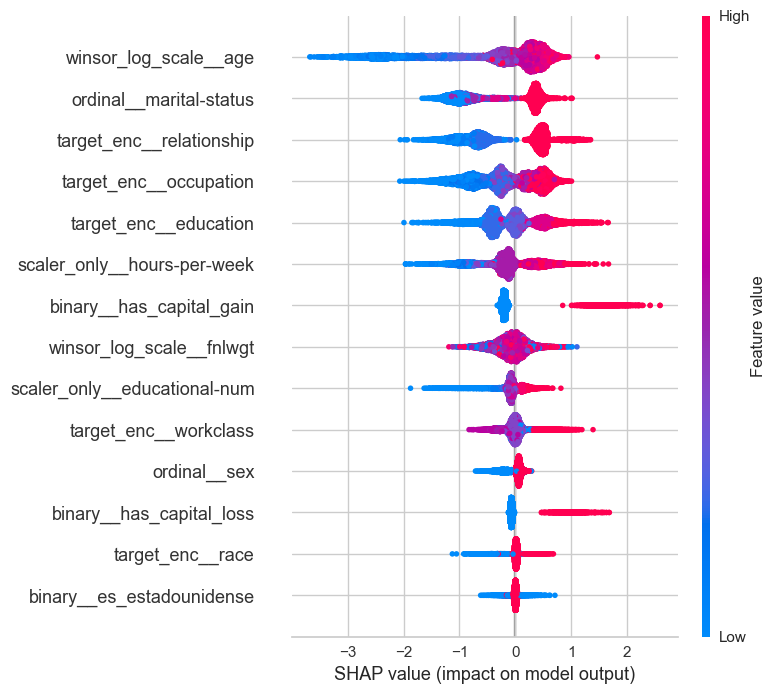

In [23]:
interpret_model(xgb_model, plot='summary', plot_type='bar')
interpret_model(xgb_model, plot='summary')

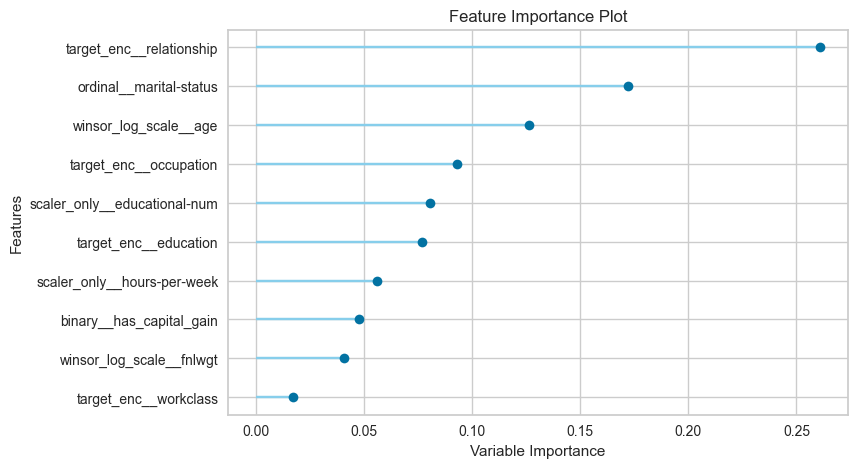

In [24]:
plot_model(rf_model, plot='feature')

In [25]:
voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('xgb',  xgb_model),
        ('rf',   rf_model)
    ],
    voting='soft',
    n_jobs=-1
)

In [26]:
# Exportar voting classifier
save_model(voting_clf, '../models/VotingClassifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  VotingClassifier(estimators=[('lgbm',
                                                LGBMClassifier(bagging_fraction=0.4,
                                                               bagging_freq=0,
                                                               boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               feature_...
                                                                       max_features=0.4,
                                                                       max_leaf_n

In [27]:
pipeline_voting = Pipeline(steps=[
    ("preprocesador", preprocessor),
    ("voting_clf", voting_clf)
])

In [28]:
#Abrir X_train_raw (csv)
X_train_raw = pd.read_csv("../preprocessing/X_train_raw.csv")


In [29]:
pipeline_voting.fit(X_train_raw, y_train)

Pipeline(memory=None,
         steps=[('preprocesador',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Never-married',
                                                                              'Separated',
                                                                              'Divorced',
                                                                              'Widowed',
                                                                              'Married-civ-spouse'],
                                                                             ['Female',
                                                                              'Male']],
                                                                 dtype=<class 'numpy.float64'>,
                                                                 encoded_missing_value=nan,
                                                                 handle_unknown...
                                                                      max_features=0.4,
                                                                      max_leaf_nodes=None,
                                                                      max_samples=None,
                                                                      min_impurity_decrease=4.490672633438402e-06,
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=10,
                                                                      min_weight_fraction_leaf=0.0,
                                                                      monotonic_cst=None,
                                                                      n_estimators=300,
                                                                      n_jobs=-1,
                                                                      oob_score=False,
                                                                      random_state=42,
                                                                      verbose=0,
                                                                      warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

In [30]:
joblib.dump(pipeline_voting, "../models/pipeline_voting_classifier.pkl")

['../models/pipeline_voting_classifier.pkl']

In [31]:
# abrir X_test_raw (csv) y  y_test (csv)
X_test_raw = pd.read_csv("../preprocessing/X_test_raw.csv")
y_test = pd.read_csv("../preprocessing/y_test_raw.csv")
# Asi se observa el data sampling bias


In [32]:
y_pred = pipeline_voting.predict(X_test_raw)

[LightGBM] [Warning] feature_fraction is set=0.6637577331805016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6637577331805016
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


In [33]:
print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall   :", round(recall_score(y_test, y_pred), 3))
print("F1-score :", round(f1_score(y_test, y_pred), 3))

Accuracy : 0.837
Precision: 0.626
Recall   : 0.763
F1-score : 0.688
